In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
def plot_graph(coordinates, annotate=True):
    """
    Makes a plot of all cities.
    Input: city_coordinates; dictionary of all cities and their coordinates in (x,y) format
    """
    names = []
    x = []
    y = []
    plt.figure(dpi=250)
    for ix, coord in coordinates.items():
        names.append(ix)
        x.append(coord[0])
        y.append(coord[1])
        if annotate:
            plt.annotate(ix, xy=(coord[0], coord[1]), xytext=(20, -20),
                        textcoords='offset points', ha='right', va='bottom',
                        bbox=dict(boxstyle='round,pad=0.5', fc='w', alpha=0.5),
                        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.scatter(x,y,c='r',marker='o')

In [4]:
def plot_graph(coordinates,annotation_font_size=8):
    """
    Makes a plot of all cities.
    Input: coordinates; dictionary of all cities and their coordinates in (x,y) format
    """
    plt.figure(dpi=250)

    customers = [city for city in coordinates if city.startswith('C')]
    depots = [city for city in coordinates if city.startswith('O')]
    charging_stations = [city for city in coordinates if city.startswith('F')]

    # Plot customers
    for city in customers:
        coord = coordinates[city]
        plt.scatter(coord[0], coord[1], c='red', marker='o', label='Customer')

    # Plot depots
    for city in depots:
        coord = coordinates[city]
        plt.scatter(coord[0], coord[1], c='blue', marker='s', label='Depot')

    # Plot charging stations
    for city in charging_stations:
        coord = coordinates[city]
        plt.scatter(coord[0], coord[1], c='green', marker='^', label='Charging Station')

    # Annotate points with a smaller font size
    for name, (x, y) in coordinates.items():
        plt.annotate(name, xy=(x, y), xytext=(5, 5), textcoords='offset points', fontsize=annotation_font_size)

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title('Customer & C')
    plt.show()

In [5]:
def plot_route(coordinates, route, route_in_title=True, annotation_font_size=8):
    """
    Takes the coordinates of the cities and the guessed path and
    makes a plot connecting the cities in the guessed order.
    """
    # Create the plot
    plt.figure(dpi=250)
    # Plot depot, customers, and charging stations with different colors
    for point in route:
        if 'O' in point:
            plt.scatter(coordinates[point][0], coordinates[point][1], c='blue', marker='s', label='Depot' if 'O' == point else 'End Depot')
        elif 'F' in point:
            plt.scatter(coordinates[point][0], coordinates[point][1], c='green', marker='^', label='Charging Station')
        else:
            plt.scatter(coordinates[point][0], coordinates[point][1], c='red', marker='o', label='Customer')

    # Annotate points with a smaller font size
    for name, (x, y) in coordinates.items():
        plt.annotate(name, xy=(x, y), xytext=(5, 5), textcoords='offset points', fontsize=annotation_font_size)

    # Draw the route
    for i in range(len(route)-1):
        plt.plot(
            [coordinates[route[i]][0], coordinates[route[i+1]][0]],
            [coordinates[route[i]][1], coordinates[route[i+1]][1]],
            'c--', lw=1
        )

    # Adding a legend to the plot if it's the first point being plotted
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    # Setting title
    if route_in_title:
        plt.title("Vehicle Route: [%s]" % (' -> '.join([str(x) for x in route])))

    # Display the plot
    plt.show()

In [7]:
dataset = pd.read_csv('dataset_yunani_charging.csv')
dataset

,parameter,location,coordinates-x,coordinates-y,demand
0,O,Tsimiski 30,40.633443,22.941847,0.000
1,C1,Vas. Irakleiou 26,40.634928,22.941218,0.300
2,C2,Mitropoleos 34,40.632620,22.941690,15.000
3,C3,Leof. Nikis 13,40.632470,22.941357,0.700
4,C4,Karolou Ntil 2,40.631272,22.941907,0.365
5,C5,Geor. Stavrou 2,40.633118,22.943918,0.818
6,C6,Vas. Irakleiou 53,40.633603,22.943912,0.297
7,C7,Karolou Ntil 26,40.633640,22.944379,0.240
8,C8,Dragoumi 19,40.635333,22.944464,1.000
9,C9,Ethnikis Amunis 22,40.629084,22.951692,0.297


In [8]:
coordinates = {row['parameter']: (row['coordinates-x'], row['coordinates-y']) for _, row in dataset.iterrows()}
print(coordinates)

{'O': (40.6334432801894, 22.9418467953214), 'C1': (40.6349279166224, 22.9412182927558), 'C2': (40.6326201426558, 22.9416903933331), 'C3': (40.63247031267, 22.9413574091084), 'C4': (40.6312719481036, 22.9419066106642), 'C5': (40.6331178653117, 22.9439183260072), 'C6': (40.6336027657025, 22.9439123688964), 'C7': (40.6336401535569, 22.9443790818286), 'C8': (40.6353327492221, 22.9444640664858), 'C9': (40.629084109805, 22.951692010664), 'C10': (40.6284246574699, 22.947519714663), 'C11': (40.6315705856702, 22.9442026953213), 'C12': (40.6299074507659, 22.9465806529926), 'C13': (40.629469164238, 22.9473739953211), 'C14': (40.6285775513548, 22.9486477848319), 'C15': (40.6328140608705, 22.9464923664857), 'C16': (40.6373190748585, 22.9409660891561), 'C17': (40.6369786027788, 22.9420327548432), 'C18': (40.6363159717814, 22.942701352993), 'C19': (40.6372170978517, 22.9387638233984), 'C20': (40.638374458554, 22.9387104953217), 'C21': (40.6367745704391, 22.9382767376502), 'C22': (40.6378270088688, 22

In [9]:
#Create a list of customer codes
customers = customers = [row['parameter'] for _, row in dataset.iterrows() if row['parameter'].startswith('C')]
print(customers)

charging_stations = [row['parameter'] for _, row in dataset.iterrows() if row['parameter'].startswith('F')]
print(charging_stations)

#Create a list of charging station codes

nodes = [row['parameter'] for _, row in dataset.iterrows()]
print (nodes)

#Creat a list of demands
demands = {row['parameter']: (row['demand']) for _, row in dataset.iterrows()}
print (demands)

start_depot = 'O'
end_depot = 'O1' #start depot

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29']
['F1', 'F2', 'F3', 'F4']
['O', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'O1', 'F1', 'F2', 'F3', 'F4']
{'O': 0.0, 'C1': 0.3, 'C2': 15.0, 'C3': 0.7, 'C4': 0.365, 'C5': 0.818, 'C6': 0.297, 'C7': 0.24, 'C8': 1.0, 'C9': 0.297, 'C10': 0.3, 'C11': 0.15, 'C12': 0.3, 'C13': 0.228, 'C14': 15.0, 'C15': 0.31, 'C16': 0.228, 'C17': 0.3, 'C18': 1.0, 'C19': 0.31, 'C20': 0.297, 'C21': 0.3, 'C22': 0.15, 'C23': 1.0, 'C24': 0.228, 'C25': 0.3, 'C26': 0.15, 'C27': 0.24, 'C28': 0.818, 'C29': 1.0, 'O1': 0.0, 'F1': 0.0, 'F2': 0.0, 'F3': 0.0, 'F4': 0.0}


In [ ]:
#coordinates = {
    #'O': (0, 0),
    #'C1': (30, 0),
    #'C2': (0, 40),
    #'C3': (0, 20),
    #'C4': (15,25),
    #'C5':(40,30),
    #'C6':(30,30),
    #'C7':(35,15),
    #'F1': (0, 30),
    #'F2': (25, 20),
    #'F3': (40,10),
    #'O1': (0,0)
    #}

In [ ]:
#Notation
#charging_stations = ['F1','F2','F3']
#customers = ['C1','C2','C3','C4','C5','C6','C7']
#CF = ['F1', 'F2','C1','C2']
#nodes = ['O','C1','C2','C3','C4','C5','C6','C7','F1','F2','F3','O1']
#end_depot = 'O1' #start depot
#start_depot = 'O'
#FO = ['F1', 'F2','C1','C2','O']
#Oend = 'O1' #end depot
#OF = ['F1', 'F2','C1','C2','O']
#Vehicle = ['V1']
#demands = {'C1': 453, 'C2': 1360,'C3':500,'C4':200,'C5':300,'C6':500,'C7':200, 'F1':0, 'F2':0,'F3':0, 'O':0, 'O1':0}

In [44]:
Qm = 25 #kWh (battery capacity)
speed = {(i, j): 40 for i in nodes for j in nodes if i != j} #m/s
ef = 0.7 #Efficiency
mas = 3629 #kg vehicle mass
g = 9.8 #m/s2
fr = 0.01 # rolling resistance
theta_ij = {(i, j): 0 for i in nodes for j in nodes if i != j}
rho = 1.204 #air density kg/m3
cd = 0.7 #coefficient of drug
A = 5 #m2 frontal surface
accel = 0 #m/s2 accelaration
#demands = {'C1': 453, 'C2': 1360,'C3':500,'C4':200,'C5':300,'C6':500,'C7':200, 'F1':0, 'F2':0,'F3':0, 'O':0, 'O1':0}
maxload = 800
charge_time = 0.5 #charging time

In [47]:
route = ['O', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
         'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18',
         'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28',
         'C29', 'O1']

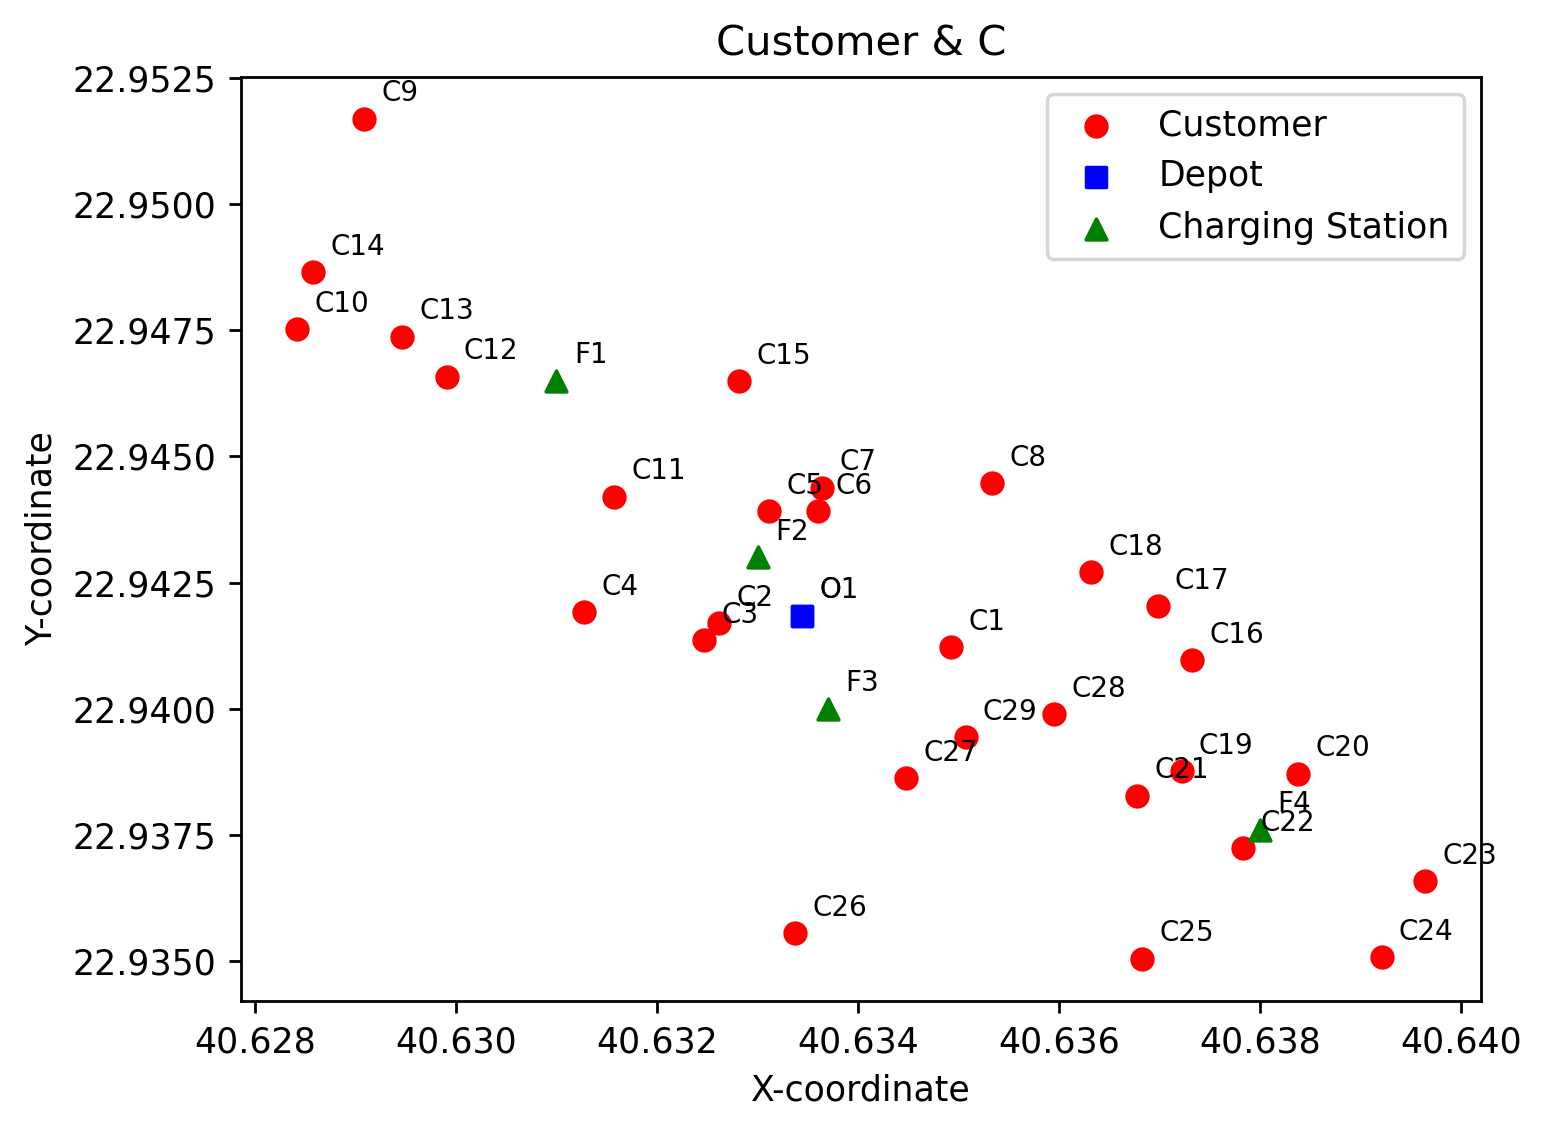

In [12]:
plot_graph (coordinates)

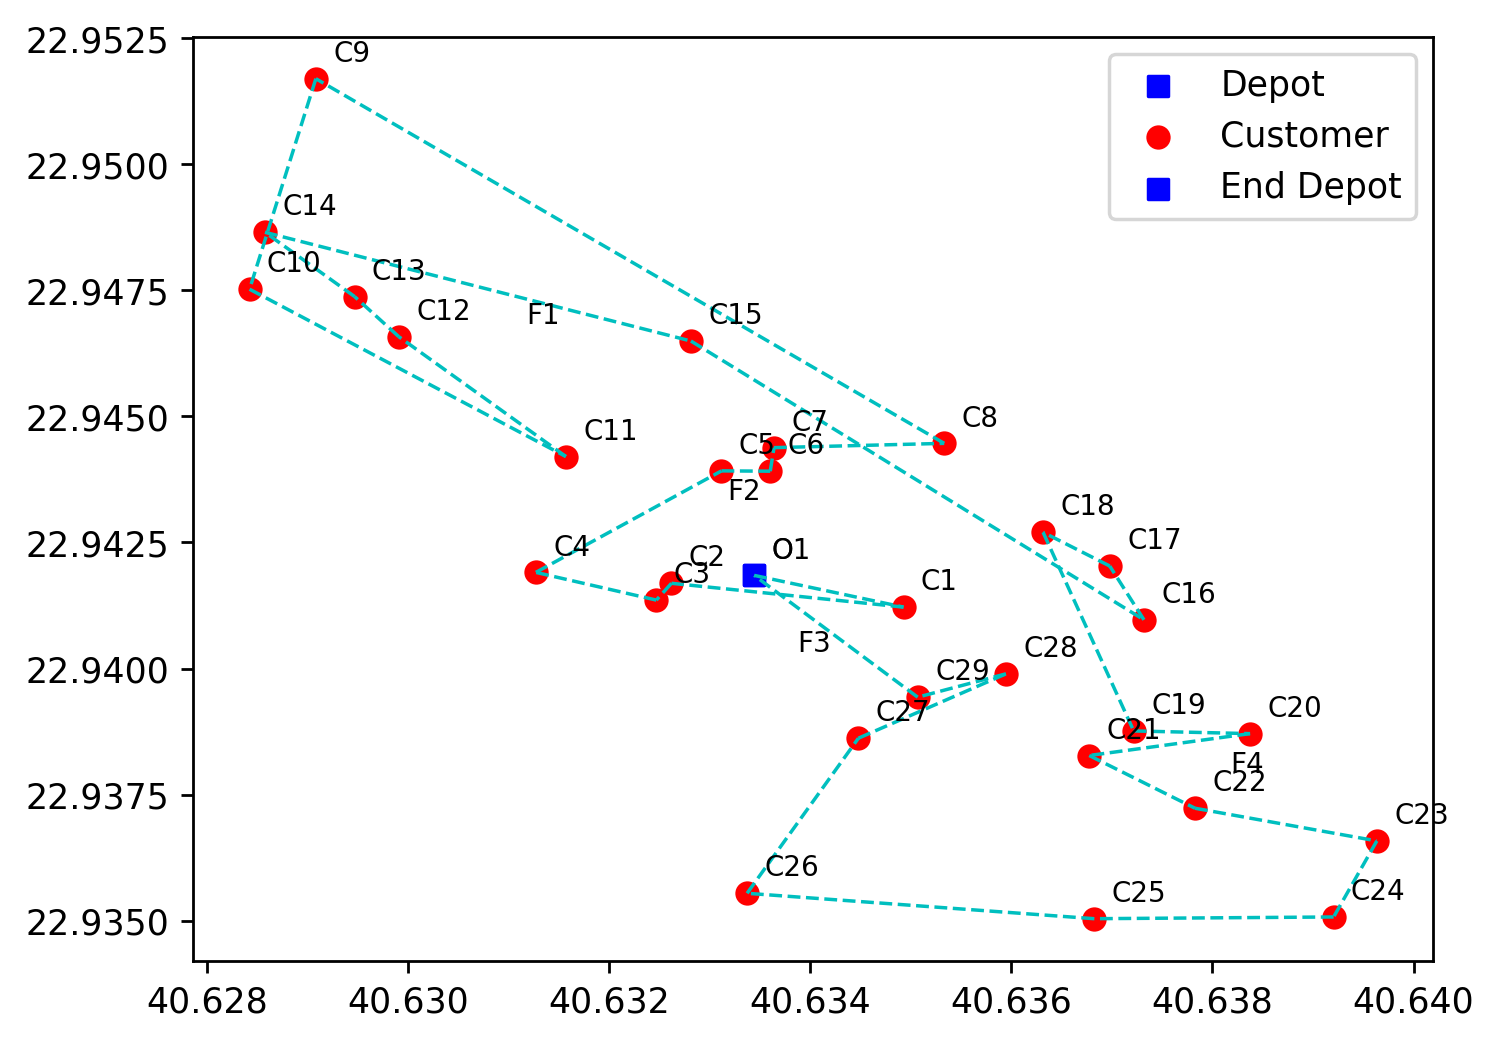

In [13]:
plot_route(coordinates,route,route_in_title=False)

# **Calculate Load**

In [48]:
def calculate_route_load(route, demands, start_depot='O'):
    load = {start_depot: 0}
    for i, j in zip(route[:-1], route[1:]):
        if j not in demands:
            print(f"Warning: Node {j} not in demands dictionary. Check route and demands initialization.")
            continue  # Skip this iteration
        load[j] = load[i] + demands.get(j, 0)
    return load

In [49]:
loads = calculate_route_load(route, demands)
loads

{'O': 0,
 'C1': 0.3,
 'C2': 15.3,
 'C3': 16.0,
 'C4': 16.365,
 'C5': 17.183,
 'C6': 17.48,
 'C7': 17.72,
 'C8': 18.72,
 'C9': 19.017,
 'C10': 19.317,
 'C11': 19.467,
 'C12': 19.767,
 'C13': 19.995,
 'C14': 34.995000000000005,
 'C15': 35.30500000000001,
 'C16': 35.53300000000001,
 'C17': 35.833000000000006,
 'C18': 36.833000000000006,
 'C19': 37.14300000000001,
 'C20': 37.440000000000005,
 'C21': 37.74,
 'C22': 37.89,
 'C23': 38.89,
 'C24': 39.118,
 'C25': 39.418,
 'C26': 39.568,
 'C27': 39.808,
 'C28': 40.626,
 'C29': 41.626,
 'O1': 41.626}

# **Calculate Time**

In [ ]:
#import math

#def euclidean_distance(coord1, coord2):
    """Calculate Euclidean distance between two points."""
    return math.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

#def calculate_distance_matrix(coordinates):
    """Calculate the distance matrix for a set of coordinates."""
    distance_matrix = {}
    for node_i, coord_i in coordinates.items():
        for node_j, coord_j in coordinates.items():
                distance_matrix[(node_i, node_j)] = euclidean_distance(coord_i, coord_j)
    return distance_matrix

# Calculate the distance matrix from the coordinates
#distance_matrix = calculate_distance_matrix(coordinates)
#distance_matrix

In [50]:
from math import radians, sin, cos, sqrt, atan2

# Haversine formula implementation
def haversine(coord1, coord2):
    R = 6371.0  # Earth radius in km
    lat1, lon1 = map(radians, coord1)
    lat2, lon2 = map(radians, coord2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

def calculate_distance_matrix(coordinates):
    """Calculate the distance matrix for a set of coordinates."""
    distance_matrix = {}
    for node_i, coord_i in coordinates.items():
        for node_j, coord_j in coordinates.items():
                distance_matrix[(node_i, node_j)] = haversine(coord_i, coord_j)*10
    return distance_matrix

distance_matrix = calculate_distance_matrix(coordinates)
distance_matrix

{('O', 'O'): 0.0,
 ('O', 'C1'): 1.7339407667321274,
 ('O', 'C2'): 0.9247537224204352,
 ('O', 'C3'): 1.158029388306601,
 ('O', 'C4'): 2.4149386896205467,
 ('O', 'C5'): 1.7851203487435185,
 ('O', 'C6'): 1.752027645537029,
 ('O', 'C7'): 2.148047529971155,
 ('O', 'C8'): 3.048256125036391,
 ('O', 'C9'): 9.61875023724681,
 ('O', 'C10'): 7.352507979540375,
 ('O', 'C11'): 2.878974074405014,
 ('O', 'C12'): 5.605008674623738,
 ('O', 'C13'): 6.425185520609681,
 ('O', 'C14'): 7.887425941986791,
 ('O', 'C15'): 3.982124452615479,
 ('O', 'C16'): 4.373292907420604,
 ('O', 'C17'): 3.934229948938699,
 ('O', 'C18'): 3.2746693346639093,
 ('O', 'C19'): 4.937268700897531,
 ('O', 'C20'): 6.088471011879965,
 ('O', 'C21'): 4.774570572440115,
 ('O', 'C22'): 6.2392387909982645,
 ('O', 'C23'): 8.192637964316324,
 ('O', 'C24'): 8.584047857826809,
 ('O', 'C25'): 6.86235918290301,
 ('O', 'C26'): 5.317661824866673,
 ('O', 'C27'): 2.9569918842604714,
 ('O', 'C28'): 3.234607722904061,
 ('O', 'C29'): 2.7234121164223772,

In [51]:
def calculate_travel_time(nodes, distances, speeds):
    travel_time = {}

    # Calculate travel time for all pairs of nodes
    for i in nodes:
        for j in nodes:  # No travel time needed for the same node
                distance = distances.get((i, j), None)
                speed = speeds.get((i, j), None)

                if distance is not None and speed is not None and speed > 0:  # Valid distance and speed
                    travel_time[(i, j)] = distance / speed
                else:
                    # Handle cases where no distance/speed data is available or speed is zero
                    travel_time[(i, j)] = float('inf')  # Infeasible route due to no speed or data

    return travel_time

travel_times = calculate_travel_time(nodes, distance_matrix,speed)
travel_times

{('O', 'O'): inf,
 ('O', 'C1'): 0.043348519168303186,
 ('O', 'C2'): 0.02311884306051088,
 ('O', 'C3'): 0.028950734707665026,
 ('O', 'C4'): 0.060373467240513665,
 ('O', 'C5'): 0.044628008718587964,
 ('O', 'C6'): 0.043800691138425725,
 ('O', 'C7'): 0.05370118824927887,
 ('O', 'C8'): 0.07620640312590977,
 ('O', 'C9'): 0.24046875593117023,
 ('O', 'C10'): 0.18381269948850937,
 ('O', 'C11'): 0.07197435186012535,
 ('O', 'C12'): 0.14012521686559345,
 ('O', 'C13'): 0.16062963801524202,
 ('O', 'C14'): 0.19718564854966977,
 ('O', 'C15'): 0.09955311131538698,
 ('O', 'C16'): 0.1093323226855151,
 ('O', 'C17'): 0.09835574872346747,
 ('O', 'C18'): 0.08186673336659774,
 ('O', 'C19'): 0.12343171752243827,
 ('O', 'C20'): 0.1522117752969991,
 ('O', 'C21'): 0.11936426431100286,
 ('O', 'C22'): 0.15598096977495662,
 ('O', 'C23'): 0.2048159491079081,
 ('O', 'C24'): 0.21460119644567022,
 ('O', 'C25'): 0.17155897957257524,
 ('O', 'C26'): 0.13294154562166682,
 ('O', 'C27'): 0.07392479710651179,
 ('O', 'C28'): 0.

In [52]:
def calculate_departure_times_for_route(route, travel_times, charging_stations, charging_time, start_depot='O'):
    departure_times = {start_depot: 0}
    for i, j in zip(route[:-1], route[1:]):
        if i in charging_stations:
            departure_times[j] = departure_times[i] + travel_times[(i, j)] + charging_time
        else:
            departure_times[j] = departure_times[i] + travel_times[(i, j)]
    return departure_times

In [53]:
departure_times = calculate_departure_times_for_route(route, travel_times, charging_stations, charge_time)
departure_times

{'O': 0,
 'C1': 0.043348519168303186,
 'C2': 0.10827018782290285,
 'C3': 0.116436935041254,
 'C4': 0.1517073251733462,
 'C5': 0.21829807670772533,
 'C6': 0.23177827837471152,
 'C7': 0.24167883355019978,
 'C8': 0.2887649899810688,
 'C9': 0.5199031960592005,
 'C10': 0.6098176466771661,
 'C11': 0.7218230868551371,
 'C12': 0.7900456372654622,
 'C13': 0.8107480010950087,
 'C14': 0.8473067037927756,
 'C15': 0.9735504134044253,
 'C16': 1.1446484398355457,
 'C17': 1.169059331815672,
 'C18': 1.1922592533838612,
 'C19': 1.2790172283551005,
 'C20': 1.3112100490603045,
 'C21': 1.3566164050130165,
 'C22': 1.3932522254741466,
 'C23': 1.4453276620008761,
 'C24': 1.4792921982045923,
 'C25': 1.5455171194305581,
 'C26': 1.6420244493908718,
 'C27': 1.7137926918058162,
 'C28': 1.762689640642336,
 'C29': 1.7889857420377246,
 'O1': 1.8570710449482841}

# **Calculate Energy Demand**

In [54]:
def calculate_energy_consumption(nodes, speeds, mas, demands, A, rho, cd, fr, distance, ef, accel, g=9.81):
    energy_consumption = {}

    for i in range(len(nodes)):
        from_node = nodes[i]
        for j in range(len(nodes)):
                to_node = nodes[j]

                # Convert speed to m/s from whatever unit it's in; ensure this isn't resulting in 0
                current_speed = speeds.get((from_node, to_node), 0) * 0.277

                # Calculate forces and power
                load_i = mas + demands.get(from_node, 0)  # Total mass including demand
                rolling_resistance_force = load_i * g * fr
                aerodynamic_drag_force = 0.5 * rho * cd * A * (current_speed ** 2)
                acceleration_force = load_i * accel * 1.1  # Assuming acceleration to desired speed
                power = current_speed * (rolling_resistance_force + aerodynamic_drag_force + acceleration_force) / (ef * 1000)  # Power in kW

                # Handle division by zero for current_speed
                if current_speed > 0:
                    time_in_hours = ((distance[(from_node, to_node)] * 1000) / current_speed) / 3600  # Time in hours
                    energy_consumption[(from_node, to_node)] = power * time_in_hours  # Energy in kWh
                else:
                    # Assign a high value to denote impracticality/impossibility due to zero speed
                    energy_consumption[(from_node, to_node)] = 1000

    return energy_consumption

energy_consumption = calculate_energy_consumption(nodes, speed, mas, demands, A, rho, cd, fr,distance_matrix, ef, accel)
energy_consumption

{('O', 'O'): 1000,
 ('O', 'C1'): 0.4229396011869007,
 ('O', 'C2'): 0.22556420499514285,
 ('O', 'C3'): 0.2824643707848002,
 ('O', 'C4'): 0.5890473457198092,
 ('O', 'C5'): 0.4354232294746218,
 ('O', 'C6'): 0.42735131896597905,
 ('O', 'C7'): 0.5239477513229601,
 ('O', 'C8'): 0.7435249545854806,
 ('O', 'C9'): 2.3461876364580863,
 ('O', 'C10'): 1.7934100473633519,
 ('O', 'C11'): 0.7022339921974926,
 ('O', 'C12'): 1.3671632728044094,
 ('O', 'C13'): 1.567219280944631,
 ('O', 'C14'): 1.9238862401177192,
 ('O', 'C15'): 0.9713123770888211,
 ('O', 'C16'): 1.0667254577697567,
 ('O', 'C17'): 0.9596300389878039,
 ('O', 'C18'): 0.798751242830483,
 ('O', 'C19'): 1.2042893825292735,
 ('O', 'C20'): 1.4850885053332001,
 ('O', 'C21'): 1.1646043581709615,
 ('O', 'C22'): 1.5218635011090387,
 ('O', 'C23'): 1.99833298794105,
 ('O', 'C24'): 2.0938049599011546,
 ('O', 'C25'): 1.6738538661203552,
 ('O', 'C26'): 1.297074164589019,
 ('O', 'C27'): 0.7212639510166339,
 ('O', 'C28'): 0.7889794891317982,
 ('O', 'C29')

In [55]:
def calculate_remaining_battery(route, Q_max, energy_consumption, charging_stations):
    Q = {route[0]: Q_max}

    for i, j in zip(route[:-1], route[1:]):
      Q[j] = Q[i] - energy_consumption[(i, j)]

      if j in charging_stations:
        Q[j] = Q_max

    return Q

In [56]:
battery_remained = calculate_remaining_battery(route,Qm,energy_consumption,charging_stations)
battery_remained

{'O': 25,
 'C1': 24.5770603988131,
 'C2': 23.943607172806285,
 'C3': 23.86373571030786,
 'C4': 23.519573751737624,
 'C5': 22.869828222645594,
 'C6': 22.73828842534933,
 'C7': 22.64168684774775,
 'C8': 22.182262549102962,
 'C9': 19.926750610866655,
 'C10': 19.049438417265698,
 'C11': 17.956579763423594,
 'C12': 17.290935133162506,
 'C13': 17.08893818167374,
 'C14': 16.73223197641803,
 'C15': 15.497558066681815,
 'C16': 13.828119002356944,
 'C17': 13.589939964191302,
 'C18': 13.363573860777333,
 'C19': 12.516965021827142,
 'C20': 12.202852968069994,
 'C21': 11.75981461916704,
 'C22': 11.40235186228725,
 'C23': 10.894253960874384,
 'C24': 10.56281841768147,
 'C25': 9.916656530068444,
 'C26': 8.975015922802053,
 'C27': 8.27477612086768,
 'C28': 7.797683741113344,
 'C29': 7.541086404316624,
 'O1': 6.876690776528063}

In [57]:
check = calculate_remaining_battery(route,Qm,energy_consumption,charging_stations)
check

{'O': 25,
 'C1': 24.5770603988131,
 'C2': 23.943607172806285,
 'C3': 23.86373571030786,
 'C4': 23.519573751737624,
 'C5': 22.869828222645594,
 'C6': 22.73828842534933,
 'C7': 22.64168684774775,
 'C8': 22.182262549102962,
 'C9': 19.926750610866655,
 'C10': 19.049438417265698,
 'C11': 17.956579763423594,
 'C12': 17.290935133162506,
 'C13': 17.08893818167374,
 'C14': 16.73223197641803,
 'C15': 15.497558066681815,
 'C16': 13.828119002356944,
 'C17': 13.589939964191302,
 'C18': 13.363573860777333,
 'C19': 12.516965021827142,
 'C20': 12.202852968069994,
 'C21': 11.75981461916704,
 'C22': 11.40235186228725,
 'C23': 10.894253960874384,
 'C24': 10.56281841768147,
 'C25': 9.916656530068444,
 'C26': 8.975015922802053,
 'C27': 8.27477612086768,
 'C28': 7.797683741113344,
 'C29': 7.541086404316624,
 'O1': 6.876690776528063}

# **Fitness Function**

In [58]:
energy_cost = 0.64 #$/kWh
hourly_wage = 16.43 #$/hour

In [59]:
def objective_function(route, hourly_wage, energy_cost, tc, travel_times, charging_stations, Qm, energy_consumption, customers):
    # Calculate the cost components as before
    route_remaining_battery = calculate_remaining_battery(route, Qm, energy_consumption, charging_stations)
    ctt = sum(hourly_wage * travel_times.get((route[i], route[i+1]), 0) for i in range(len(route) - 1))
    ce = sum(energy_cost * energy_consumption.get((route[i], route[i+1]), 0) for i in range(len(route) - 1))
    ct = sum(hourly_wage*tc for i in range(len(route) - 1))
    total_cost = ctt + ce + ct

    # Penalize if the remaining battery capacity is below 0 at any point
    if any(value < 0 for value in route_remaining_battery.values()):
        total_cost += 10000  # Large penalty

    # Check if all customers are served
    served_customers = set(route) & set(customers)
    missing_customers_penalty = (len(customers) - len(served_customers)) * 10000  # Large penalty for each missing customer

    # Add penalties to the total cost
    total_cost += missing_customers_penalty

    return total_cost

In [26]:
route

['O',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'C23',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'C29',
 'O1']

In [27]:
minimize_cost = objective_function(route, hourly_wage,energy_cost, charge_time, travel_times,
                                   charging_stations, Qm, energy_consumption,customers)
minimize_cost

288.56059517152244

# **Create Population**

In [60]:
def find_nearest_charging_station(current_node, charging_stations, distance_matrix):
    """Find the nearest charging station to the current location using a precomputed distance matrix."""
    nearest_station = None
    min_distance = float('inf')

    for station in charging_stations:
        distance = distance_matrix.get((current_node, station), float('inf'))
        if distance < min_distance:
            min_distance = distance
            nearest_station = station

    return nearest_station

In [61]:
def insert_charging_stations(route, charging_stations, Q_max, energy_consumption):
    new_route = [route[0]]  # Start with the depot
    Q = {route[0]: Q_max}  # Initialize the remaining battery dictionary

    for i in range(1, len(route)):
        from_node = route[i - 1]
        to_node = route[i]
        energy_needed = energy_consumption.get((from_node, to_node), float('inf'))

        if Q[from_node] >= energy_needed:
            # If the vehicle can reach the next node, update the battery level and continue
            Q[to_node] = Q[from_node] - energy_needed
            new_route.append(to_node)
        else:
            # Find the nearest charging station if the vehicle cannot reach the next node
            charging_station = find_nearest_charging_station(from_node, charging_stations, energy_consumption)
            if charging_station:
                # Insert the charging station into the route and recharge
                new_route.append(charging_station)
                Q[charging_station] = Q_max - energy_consumption.get((from_node, charging_station), 0)
                # Check if we can reach the next node after charging
                if Q[charging_station] >= energy_consumption.get((charging_station, to_node), float('inf')):
                    new_route.append(to_node)
                    Q[to_node] = Q[charging_station] - energy_consumption.get((charging_station, to_node), 0)
                else:
                    # If still can't reach the next node, this route is not feasible
                    return None
            else:
                # If no charging station is reachable, this route is not feasible
                return None

    return new_route

In [30]:
route = ['O', 'C6', 'C1', 'C4', 'C3', 'C7', 'C2', 'C5', 'O1']

In [31]:
find_nearest_charging_station('C1',charging_stations,distance_matrix)

'F3'

In [32]:
test = insert_charging_stations(route,charging_stations, Qm, energy_consumption)
test

['O', 'C6', 'C1', 'C4', 'C3', 'C7', 'C2', 'C5', 'O1']

In [33]:
def create_initial_population(customers, N):
    population = []
    for _ in range(N):
        individual = customers.copy()
        random.shuffle(individual)
        population.append(individual)
    return population

In [34]:
def can_reach_with_remaining_energy(from_node, to_node, remaining_energy, energy_consumption):
    """Check if the vehicle can reach the next node with the remaining energy."""
    energy_required = energy_consumption.get((from_node, to_node), float('inf'))
    return remaining_energy >= energy_required

In [35]:
def evaluate_route_feasibility(route, charging_stations, coordinates, Q_max, energy_consumption):
    # First, calculate the remaining battery throughout the route
    remaining_energies = calculate_remaining_battery(route, Q_max, energy_consumption, charging_stations)

    # Now, for each segment, check if the vehicle can reach the next node with the remaining energy
    for i in range(len(route) - 1):
        from_node = route[i]
        to_node = route[i + 1]
        remaining_energy = remaining_energies[from_node]  # Get remaining energy at from_node

        if not can_reach_with_remaining_energy(from_node, to_node, remaining_energy, energy_consumption):
            print(f"Cannot reach {to_node} from {from_node} with remaining energy.")
            return False  # Route is not feasible

    return True  # All segments are feasible

In [36]:
def create_initial_population_with_charging_stations(customers, start_depot, end_depot, population_size, charging_stations, coordinates, Q_max, energy_consumption):
    """Create initial population and insert charging stations into each route."""
    population = []
    for _ in range(population_size):
        # Generate a random route
        shuffled_customers = random.sample(customers, len(customers))
        route = [start_depot] + shuffled_customers + [end_depot]
        # Insert charging stations into the route
        feasible_route = insert_charging_stations(route, charging_stations, Q_max, energy_consumption)
        population.append(feasible_route)
    return population


In [37]:
population = create_initial_population_with_charging_stations(customers,start_depot,end_depot,50,charging_stations,coordinates,Qm,energy_consumption)
population

[['O',
  'C18',
  'C13',
  'C11',
  'C2',
  'C24',
  'C21',
  'C15',
  'C27',
  'C29',
  'C12',
  'C28',
  'C26',
  'C25',
  'C9',
  'C14',
  'F1',
  'C19',
  'C6',
  'C17',
  'C10',
  'C1',
  'C7',
  'C20',
  'C8',
  'C3',
  'C22',
  'C23',
  'C4',
  'C5',
  'C16',
  'O1'],
 ['O',
  'C26',
  'C5',
  'C8',
  'C1',
  'C29',
  'C16',
  'C2',
  'C24',
  'C18',
  'C3',
  'C28',
  'C17',
  'C7',
  'C23',
  'C14',
  'C22',
  'F4',
  'C15',
  'C20',
  'C11',
  'C10',
  'C25',
  'C19',
  'C12',
  'C9',
  'C13',
  'C4',
  'C6',
  'C27',
  'C21',
  'O1'],
 ['O',
  'C4',
  'C24',
  'C27',
  'C23',
  'C7',
  'C16',
  'C19',
  'C17',
  'C18',
  'C15',
  'C8',
  'C13',
  'C21',
  'C26',
  'C20',
  'C6',
  'C10',
  'F1',
  'C29',
  'C22',
  'C5',
  'C25',
  'C28',
  'C14',
  'C11',
  'C1',
  'C3',
  'C9',
  'C12',
  'C2',
  'O1'],
 ['O',
  'C14',
  'C22',
  'C3',
  'C11',
  'C28',
  'C9',
  'C25',
  'C5',
  'C15',
  'C18',
  'C2',
  'C19',
  'C26',
  'F3',
  'C16',
  'C27',
  'C13',
  'C21',
  'C6',


# **Genetic Algorithm**

In [38]:
N = 50  # number of individuals
T = 200 # number of generations
Ne = 10  # number of elite individuals
Pc = 0.7  # crossover rate
Pm = 0.1  # mutation rate

In [39]:
def crossover(parent1, parent2):
    # Ensure crossover point does not include the start and end points
    crossover_point = random.randint(1, len(parent1) - 2)

    # Keep start and end of the route fixed
    start = parent1[0]  # Assuming start is 'O'
    end = parent1[-1]  # Assuming end is 'O1'

    # Perform crossover, excluding the start and end points
    child1_mid = parent1[1:crossover_point] + parent2[crossover_point:-1]
    child2_mid = parent2[1:crossover_point] + parent1[crossover_point:-1]

    # Reconstruct children with start and end points
    child1 = [start] + child1_mid + [end]
    child2 = [start] + child2_mid + [end]

    return child1, child2

In [40]:
def mutate(individual, mutation_rate, start_depot='O', end_depot='O1'):
    # Find the indices for the start and end of the route excluding depots
    start_index = 1  # Exclude start depot
    end_index = len(individual) - 2  # Exclude end depot

    for i in range(start_index, end_index + 1):  # Iterate through customers only
        if random.random() < mutation_rate:
            # Select a random position to swap with, also within the customer visitation part
            swap_with = random.randint(start_index, end_index)
            # Swap the positions
            individual[i], individual[swap_with] = individual[swap_with], individual[i]

    return individual

In [41]:
def local_search(route,hourly_wage,energy_cost,tc,travel_times,charging_stations,Qm,energy_consumption,customers):
    best = route
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1: continue  # Skip adjacent nodes (they are already optimal by the problem's constraint)
                new_route = route[:]
                new_route[i:j] = route[j - 1:i - 1:-1]  # This is the 2-opt Swap
                if objective_function(new_route, hourly_wage,energy_cost, tc, travel_times,
                                      charging_stations, Qm, energy_consumption,customers) < objective_function(best, hourly_wage,energy_cost, tc,  travel_times, charging_stations, Qm, energy_consumption,customers):
                    best = new_route
                    improved = True
        route = best
    return best


In [62]:
def is_feasible(route, Q_max, energy_consumption, charging_stations):
    """
    Check if a route is feasible given the energy constraints.

    Parameters:
    - route: a list of waypoints including customers and possibly charging stations
    - Q_max: maximum energy capacity of the vehicle
    - energy_consumption: a dictionary with energy consumption values between waypoints
    - charging_stations: a list of charging stations

    Returns:
    - True if the route is feasible, False otherwise
    """

    remaining_energy = Q_max
    for i in range(len(route) - 1):
        from_node = route[i]
        to_node = route[i + 1]

        # If the next node is a charging station, recharge the vehicle
        if to_node in charging_stations:
            remaining_energy = Q_max
            continue

        # Check the energy required to travel to the next waypoint
        energy_needed = energy_consumption.get((from_node, to_node), float('inf'))

        # If not enough energy, the route is not feasible
        if energy_needed > remaining_energy:
            return False

        # Subtract the energy required for this leg from the remaining energy
        remaining_energy -= energy_needed

    # If the loop completes without energy issues, the route is feasible
    return True

In [43]:
def select_parents(population, fitnesses, tournament_size=3):
    """
    Selects two parents using tournament selection.

    Args:
    - population: List of individuals in the population.
    - fitnesses: List of fitness values corresponding to each individual.
    - tournament_size: Number of individuals to consider for each tournament.

    Returns:
    - Tuple containing two selected parents.
    """
    def tournament():
        # Randomly select individuals for the tournament
        contenders_idx = random.sample(range(len(population)), tournament_size)
        # Find the index of the individual with the best fitness
        winner_idx = min(contenders_idx, key=lambda idx: fitnesses[idx])
        return population[winner_idx]

    # Select two parents
    parent1 = tournament()
    parent2 = tournament()
    return parent1, parent2

In [76]:
# Initialize tracking variables
overall_best_fitness = float('inf')
overall_best_individual = None
best_fitness_tracking = []
average_fitness_tracking = []

for gen in range(T):
    # Compute fitness for each individual
    fitnesses = [objective_function(route, hourly_wage, energy_cost, charge_time, travel_times, charging_stations, Qm, energy_consumption,customers) for route in population]

    # Track the best and average fitness in the current generation
    best_fitness_current_gen = min(fitnesses)
    average_fitness_current_gen = np.mean(fitnesses)

    # Update overall best if found
    if best_fitness_current_gen < overall_best_fitness:
        overall_best_fitness = best_fitness_current_gen
        overall_best_individual = population[fitnesses.index(best_fitness_current_gen)]

    print(f"Generation {gen}: Best Fitness = {best_fitness_current_gen}, Average Fitness = {average_fitness_current_gen}")

    # Select elite individuals based on their fitness
    elite_indices = sorted(range(len(fitnesses)), key=lambda i: fitnesses[i])[:Ne]
    elite_individuals = [population[i] for i in elite_indices]

    # Generate new population starting with elite individuals
    new_population = elite_individuals.copy()
    while len(new_population) < N:
        # Select parents for crossover
        parent1, parent2 = select_parents(population, fitnesses)

        # Perform crossover to generate children
        child1, child2 = crossover(parent1, parent2)

        # Mutate the children
        child1 = mutate(child1, 0.1)
        child2 = mutate(child2, 0.1)

        # Perform local search for potential improvement
        child1 = local_search(child1,hourly_wage,energy_cost,charge_time,travel_times,charging_stations,Qm,energy_consumption,customers)
        child2 = local_search(child2,hourly_wage,energy_cost,charge_time,travel_times,charging_stations,Qm,energy_consumption,customers)

        # Add the children to the new population if they are feasible
        if is_feasible(child1, Qm, energy_consumption, charging_stations):
            new_population.append(child1)
        if is_feasible(child2, Qm, energy_consumption, charging_stations) and len(new_population) < N:
            new_population.append(child2)


    # Update population with the new generation
    population = new_population

# After the final generation, print the overall best fitness and details of the best individual
print(f"Overall Best Fitness: {overall_best_fitness}")
print(f"Best Individual: {overall_best_individual}")

Generation 0: Best Fitness = 284.950164992238, Average Fitness = 325.98148468139783
Generation 1: Best Fitness = 284.950164992238, Average Fitness = 33036.61820821252
Generation 2: Best Fitness = 212.41991995493498, Average Fitness = 37634.29569087022
Generation 3: Best Fitness = 212.41991995493498, Average Fitness = 36630.23552611723
Generation 4: Best Fitness = 212.41991995493498, Average Fitness = 45620.70670966017
Generation 5: Best Fitness = 212.41991995493498, Average Fitness = 35417.24519116259
Generation 6: Best Fitness = 209.2856951546603, Average Fitness = 28214.246689449978
Generation 7: Best Fitness = 209.2856951546603, Average Fitness = 57413.38084850659
Generation 8: Best Fitness = 209.2856951546603, Average Fitness = 56012.766341743154
Generation 9: Best Fitness = 209.2856951546603, Average Fitness = 42413.43374155861
Generation 10: Best Fitness = 209.2856951546603, Average Fitness = 45012.35581950394
Generation 11: Best Fitness = 208.63906128243843, Average Fitness = 28

In [63]:
import numpy as np  # Assuming numpy is imported for np.mean

# Initialize tracking variables
overall_best_fitness = float('inf')
overall_best_individual = None
best_fitness_tracking = []
average_fitness_tracking = []

for gen in range(T):  # Make sure T, the total number of generations, is defined
    # Compute fitness for each individual
    fitnesses = [objective_function(route, hourly_wage, energy_cost, charge_time, travel_times, charging_stations, Qm, energy_consumption, customers) for route in population]

    # Track the best and average fitness in the current generation
    best_fitness_current_gen = min(fitnesses)
    average_fitness_current_gen = np.mean(fitnesses)

    # Append the tracked values to their respective lists
    best_fitness_tracking.append(best_fitness_current_gen)
    average_fitness_tracking.append(average_fitness_current_gen)

    # Update overall best if found
    if best_fitness_current_gen < overall_best_fitness:
        overall_best_fitness = best_fitness_current_gen
        overall_best_individual = population[fitnesses.index(best_fitness_current_gen)]

    print(f"Generation {gen}: Best Fitness = {best_fitness_current_gen}, Average Fitness = {average_fitness_current_gen}")

    # Select elite individuals based on their fitness
    elite_indices = sorted(range(len(fitnesses)), key=lambda i: fitnesses[i])[:Ne]
    elite_individuals = [population[i] for i in elite_indices]

    # Generate new population starting with elite individuals
    new_population = elite_individuals.copy()
    while len(new_population) < N:
        # Select parents for crossover
        parent1, parent2 = select_parents(population, fitnesses)

        # Perform crossover to generate children
        child1, child2 = crossover(parent1, parent2)

        # Mutate the children
        child1 = mutate(child1, 0.1)
        child2 = mutate(child2, 0.1)

        # Perform local search for potential improvement
        child1 = local_search(child1, hourly_wage, energy_cost, charge_time, travel_times, charging_stations, Qm, energy_consumption, customers)
        child2 = local_search(child2, hourly_wage, energy_cost, charge_time, travel_times, charging_stations, Qm, energy_consumption, customers)

        # Add the children to the new population if they are feasible
        if is_feasible(child1, Qm, energy_consumption, charging_stations):
            new_population.append(child1)
        if is_feasible(child2, Qm, energy_consumption, charging_stations) and len(new_population) < N:
            new_population.append(child2)

    # Update population with the new generation
    population = new_population

# After the final generation, print the overall best fitness and details of the best individual
print(f"Overall Best Fitness: {overall_best_fitness}")
print(f"Best Individual: {overall_best_individual}")


Generation 0: Best Fitness = 340.79297096609343, Average Fitness = 358.3602016227734
Generation 1: Best Fitness = 285.17503623886967, Average Fitness = 26699.112500173676
Generation 2: Best Fitness = 284.1653624829316, Average Fitness = 34091.43396685541
Generation 3: Best Fitness = 284.1653624829316, Average Fitness = 26886.169815918816
Generation 4: Best Fitness = 284.1653624829316, Average Fitness = 10485.440768681645
Generation 5: Best Fitness = 284.1171771768551, Average Fitness = 6284.970440675351
Generation 6: Best Fitness = 284.1171771768551, Average Fitness = 3284.508890030074
Generation 7: Best Fitness = 284.1171771768551, Average Fitness = 684.2867174600693
Generation 8: Best Fitness = 284.1171771768551, Average Fitness = 684.2031728176166
Generation 9: Best Fitness = 284.0839060285078, Average Fitness = 684.1826116124089
Generation 10: Best Fitness = 284.0839060285078, Average Fitness = 284.1696317143712
Generation 11: Best Fitness = 284.0839060285078, Average Fitness = 108

In [64]:
best_guess = ['O', 'C1', 'C28', 'C29', 'C27', 'C26', 'C25', 'C24', 'C23', 'C20', 'C22', 'C21', 'C19', 'C16', 'C17', 'C18', 'C8', 'C6', 'C5', 'C6', 'C7', 'C15', 'C9', 'C14', 'C10', 'C13', 'C12', 'C11', 'C4', 'C3', 'C2', 'O1']

In [65]:
best_fitness_tracking

[340.79297096609343,
 285.17503623886967,
 284.1653624829316,
 284.1653624829316,
 284.1653624829316,
 284.1171771768551,
 284.1171771768551,
 284.1171771768551,
 284.1171771768551,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078,
 284.0839060285078

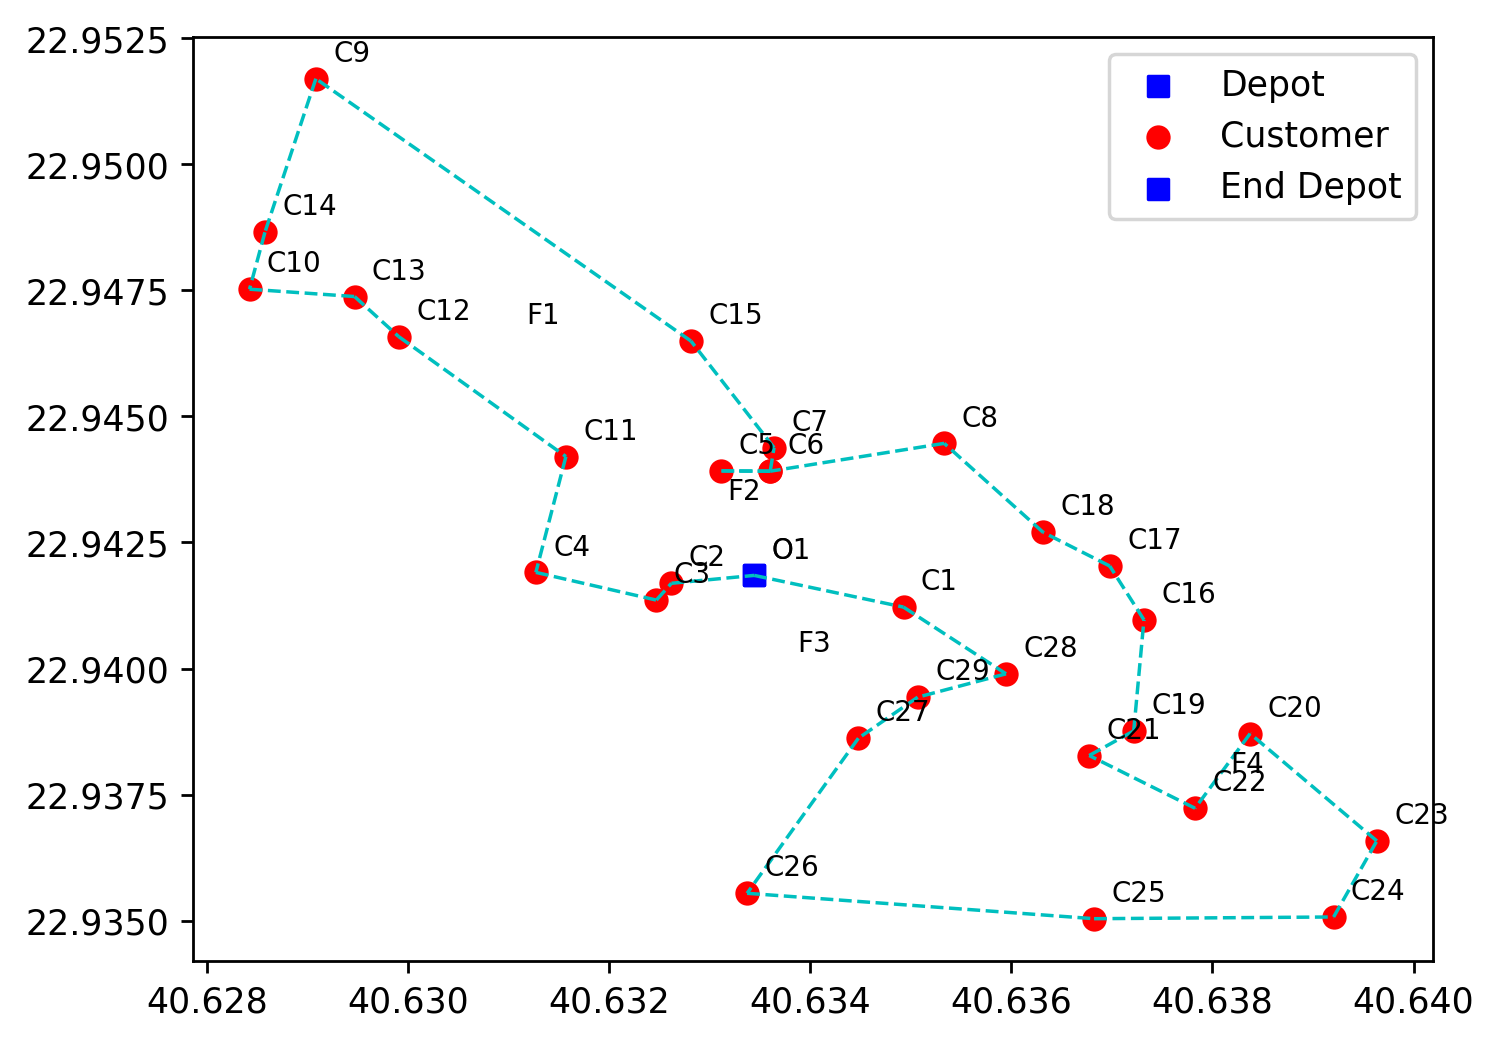

In [66]:
plot_route(coordinates,best_guess,route_in_title=False)

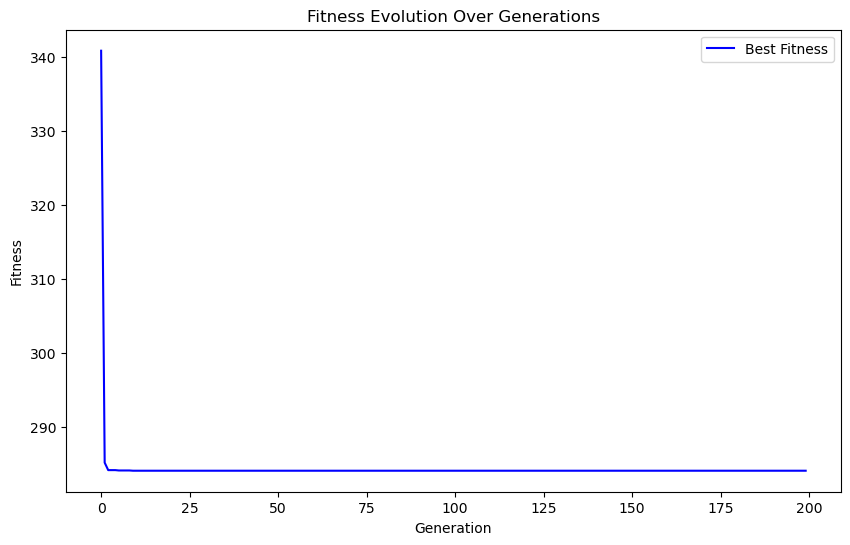

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(best_fitness_tracking, label='Best Fitness', color='blue')
#plt.plot(average_fitness_tracking, label='Average Fitness', color='red')
plt.title('Fitness Evolution Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.show()


In [69]:
best_guess_energy = calculate_remaining_battery(best_guess,Qm,energy_consumption,charging_stations)
best_guess_times= calculate_departure_times_for_route(best_guess, travel_times, charging_stations, charge_time)
best_guess_cost = objective_function(best_guess,hourly_wage, energy_cost, charge_time, travel_times, charging_stations, Qm, energy_consumption,customers)

In [70]:
print(best_guess_energy)
print(best_guess_times)
print(best_guess_cost)

{'O': 25, 'C1': 24.5770603988131, 'C28': 24.18906559970129, 'C29': 23.93246826290457, 'C27': 23.700833243952772, 'C26': 23.000583384211854, 'C25': 22.058965318300388, 'C24': 21.41279600592762, 'C23': 21.081401291988886, 'C20': 20.525956077415554, 'C22': 20.187242276897813, 'C21': 19.829788077098947, 'C19': 19.673395794353066, 'C16': 19.21926386120689, 'C17': 18.981084823041247, 'C18': 18.754718719627277, 'C8': 18.30437632439171, 'C6': 17.55847146735062, 'C5': 17.690011264646884, 'C7': 17.46186988974904, 'C15': 16.97255786827702, 'C9': 15.499749527266642, 'C14': 14.858198022652033, 'C10': 14.621751725968577, 'C13': 14.336858627377163, 'C12': 14.13486399691913, 'C11': 13.46920343181948, 'C4': 12.989684022854489, 'C3': 12.645540462831335, 'C2': 12.5658508504599, 'O1': 12.3397466553447}
{'O': 0, 'C1': 0.043348519168303186, 'C28': 0.08311352272891942, 'C29': 0.10940962412430813, 'C27': 0.13314689717428277, 'C26': 0.20491513958922714, 'C25': 0.30142246954954066, 'C24': 0.36764739077550634, '